# Dependencies

In [ ]:

# Data
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Classifiers
from sklearn.cluster import MiniBatchKMeans
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

## Ensembles
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc, roc_curve, RocCurveDisplay
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [ ]:
# SEED for randomness control
SEED = 265123

# Importing Data (SAMU)

In [ ]:
#data_2022_path = "/content/drive/MyDrive/Disciplinas/2023.1/SISTEMAS DE INFORMAÇÃO Profa. Maíra Santana/Projeto/Data/ocorrencias2022.csv"

In [ ]:
data_2022_path = "C:\\Users\\WALMIR\\Desktop\\Junior\\CIN\\SI\\data_processed.csv"

## Creating the dataframe

In [ ]:
df22 = pd.read_csv(data_2022_path)

In [ ]:
df22.head()

In [ ]:
#df22 = df22.drop(['Unnamed: 0', 'index'], axis=1)

In [ ]:
df22.dtypes

In [ ]:
X = df22.drop(['sucesso'], axis=1)
y = df22['sucesso']

# Split data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=SEED)

# Classification models

In [ ]:
from sklearn.utils.extmath import randomized_range_finder
models = {}
# decision tree classifier
models.update( {"dtc":DecisionTreeClassifier(random_state=SEED)} )
# Gaussian Naive Bayes - testar
models.update( {"gnb":GaussianNB()} )
# k-nearest neighbors
models.update( {"knn":KNeighborsClassifier()} )
# Support Vector Classification Linear
models.update( {"svcl":LinearSVC(random_state=SEED)} )
# Support Vector Classification Polynomial
models.update( {"svcp":SVC(kernel="poly", random_state=SEED, max_iter=3000)} )
# Support Vector Classification Rbf
models.update( {"svcr":SVC(kernel="rbf", random_state=SEED, max_iter=3000)} )
# Mini-Batch K-Means
#models.update( {"mbkmeans":MiniBatchKMeans(random_state=SEED)} )
# random forest
models.update( {"rf":RandomForestClassifier(random_state=SEED)} )
# Stochastic Gradient Descent Classifier
models.update( {"sgd":SGDClassifier(random_state=SEED)} )
# Logistic Regression
models.update( {"lr":LogisticRegression(random_state=SEED, max_iter=1000)} )
# Multilayer Perceptron
models.update( {"mlp":MLPClassifier(random_state=SEED, max_iter=1000)} ) 
# Extreme Gradiente Boost
models.update( {"xgb":XGBClassifier()} )

In [ ]:
trained_models = {}
for cls in models.keys():
  print(f"Training model: {cls}")
  trained_models.update({cls:models[cls].fit(X_train, y_train)})

# Predictions

In [31]:
predictions = {}
for cls in trained_models.keys():
  print(f"Retrieving predictions from model: {cls}")
  predictions.update({cls:trained_models[cls].predict(X_test)})

Retrieving predictions from model: dtc
Retrieving predictions from model: gnb
Retrieving predictions from model: knn


c:\Users\WALMIR\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Retrieving predictions from model: svcl
Retrieving predictions from model: svcp
Retrieving predictions from model: svcr
Retrieving predictions from model: rf
Retrieving predictions from model: sgd
Retrieving predictions from model: lr
Retrieving predictions from model: mlp
Retrieving predictions from model: xgb
time: 3min 22s (started: 2023-09-21 20:29:48 -03:00)


# Evaluating

In [32]:
accuracies = {}
class_rep = {}
conf_matr = {}

for pred in predictions.keys():
  # accuracy scores
  accuracies.update( { pred: accuracy_score(y_test, predictions[pred]) } )
  # classification reports
  class_rep.update( { pred: classification_report(y_test, predictions[pred]) } )
  # confusion matrixes
  conf_matr.update( { pred: confusion_matrix(y_test, predictions[pred]) } )

time: 1.25 s (started: 2023-09-21 20:33:11 -03:00)


In [33]:
accuracies

{'dtc': 0.6221923109279044,
 'gnb': 0.620061131207762,
 'knn': 0.6210986792294103,
 'svcl': 0.6592075376461681,
 'svcp': 0.5031827486610022,
 'svcr': 0.4861333108998626,
 'rf': 0.6286419337651776,
 'sgd': 0.6570483160876027,
 'lr': 0.6591514539693222,
 'mlp': 0.6626006000953423,
 'xgb': 0.6624603909032276}

time: 16 ms (started: 2023-09-21 20:33:12 -03:00)


In [34]:
for cf in class_rep.keys():
  print('------------------------------------------')
  print(f"Model: {cf}")
  print(class_rep[cf])

------------------------------------------
Model: dtc
              precision    recall  f1-score   support

           0       0.61      0.68      0.64     17876
           1       0.64      0.56      0.60     17785

    accuracy                           0.62     35661
   macro avg       0.62      0.62      0.62     35661
weighted avg       0.62      0.62      0.62     35661

------------------------------------------
Model: gnb
              precision    recall  f1-score   support

           0       0.66      0.50      0.57     17876
           1       0.60      0.74      0.66     17785

    accuracy                           0.62     35661
   macro avg       0.63      0.62      0.61     35661
weighted avg       0.63      0.62      0.61     35661

------------------------------------------
Model: knn
              precision    recall  f1-score   support

           0       0.62      0.62      0.62     17876
           1       0.62      0.62      0.62     17785

    accuracy        

------------------------------------------
Model: dtc


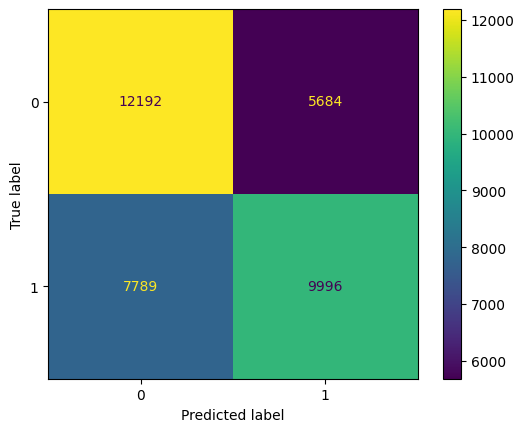

------------------------------------------
Model: gnb


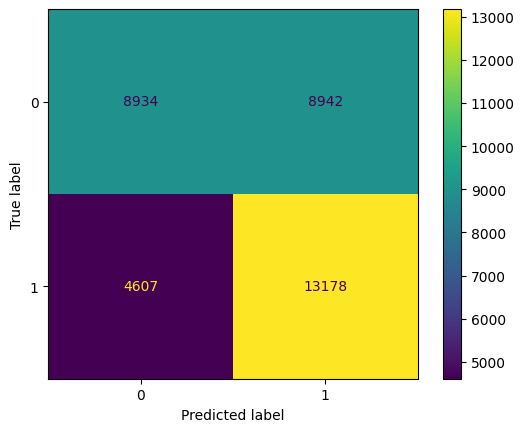

------------------------------------------
Model: knn


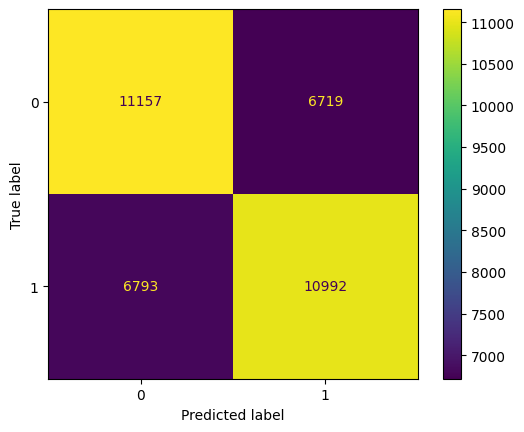

------------------------------------------
Model: svcl


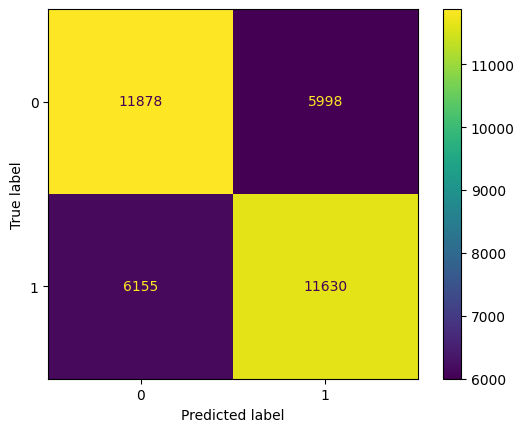

------------------------------------------
Model: svcp


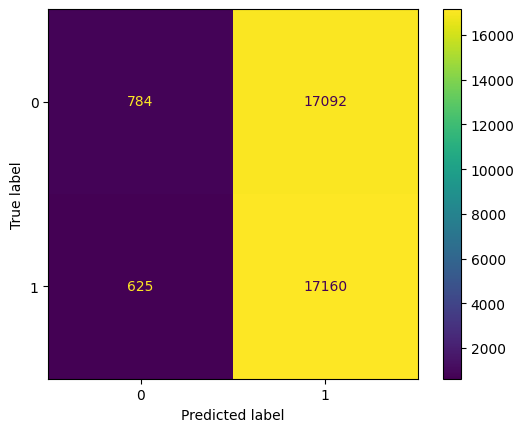

------------------------------------------
Model: svcr


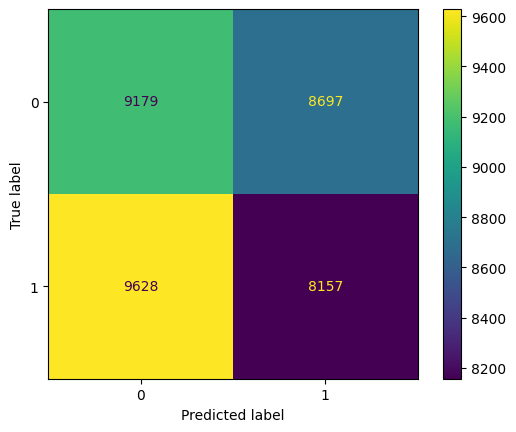

------------------------------------------
Model: rf


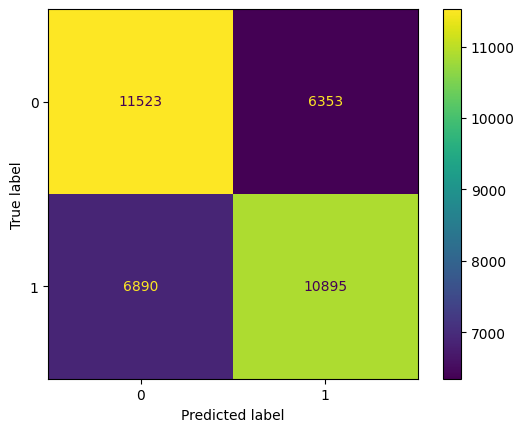

------------------------------------------
Model: sgd


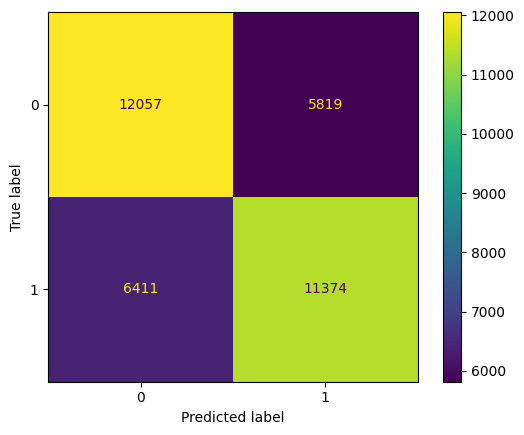

------------------------------------------
Model: lr


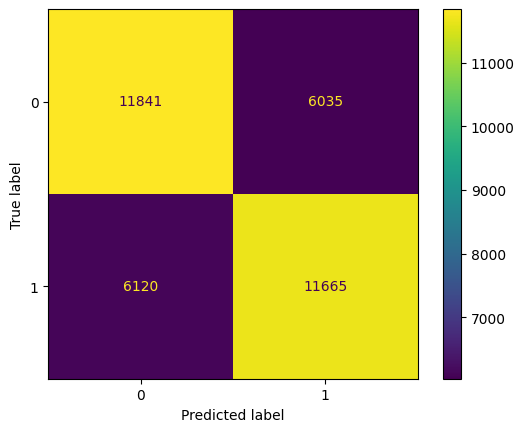

------------------------------------------
Model: mlp


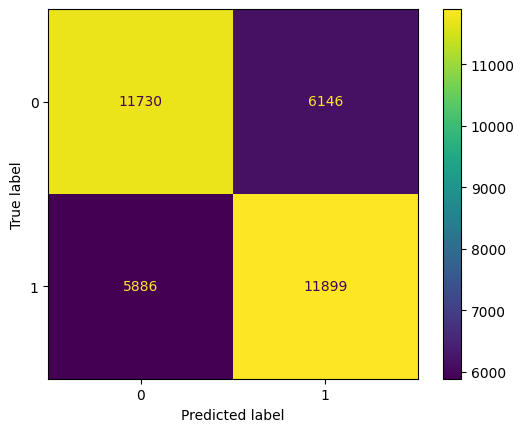

------------------------------------------
Model: xgb


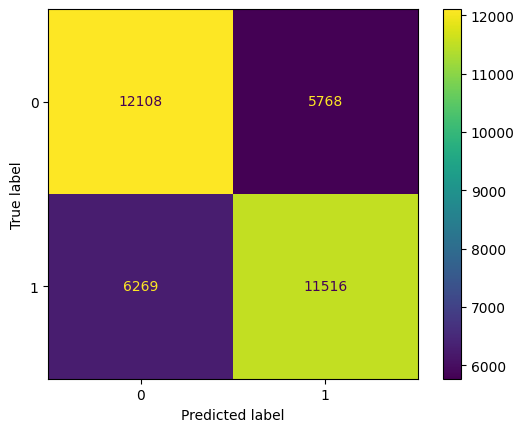

time: 3.44 s (started: 2023-09-21 20:33:12 -03:00)


In [35]:
for cm in conf_matr.keys():
  print('------------------------------------------')
  print(f"Model: {cm}")
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr[cm],display_labels=trained_models[cm].classes_)
  disp.plot()
  plt.show()

# Cross-Validation

In [36]:
cv_models = {}
# decision tree classifier
cv_models.update( {"dtc":DecisionTreeClassifier(random_state=SEED)} )
# Gaussian Naive Bayes - testar
cv_models.update( {"gnb":GaussianNB()} )
# k-nearest neighbors
cv_models.update( {"knn":KNeighborsClassifier()} )
# Support Vector Classification Linear
cv_models.update( {"svcl":LinearSVC(random_state=SEED, max_iter=3000)} )
# Support Vector Classification Polynomial
cv_models.update( {"svcp":SVC(kernel="poly", random_state=SEED, max_iter=3000)} )
# Support Vector Classification Rbf
cv_models.update( {"svcr":SVC(kernel="rbf", random_state=SEED, max_iter=3000)} )
# Mini-Batch K-Means
#cv_models.update( {"mbkmeans":MiniBatchKMeans(random_state=SEED)} )
# random forest
cv_models.update( {"rf":RandomForestClassifier(random_state=SEED)} )
# Stochastic Gradient Descent Classifier
cv_models.update( {"sgd":SGDClassifier(random_state=SEED, max_iter=3000)} )
# Logistic Regression
cv_models.update( {"lr":LogisticRegression(random_state=SEED, max_iter=1000)} )
# Multilayer Perceptron
cv_models.update( {"mlp":MLPClassifier(random_state=SEED, max_iter=1000)} ) 
# Extreme Gradiente Boost
cv_models.update( {"xgb":XGBClassifier()} )

time: 16 ms (started: 2023-09-21 20:33:16 -03:00)


In [37]:
cv_scores = {}

for cls in cv_models.keys():
  print(f"Training cross validation of model: {cls}")
  score = np.mean(cross_val_score(cv_models[cls], X_train, y_train))
  cv_scores.update( {cls: score} )

Training cross validation of model: dtc


Training cross validation of model: gnb
Training cross validation of model: knn


c:\Users\WALMIR\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\WALMIR\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

Training cross validation of model: svcl
Training cross validation of model: svcp


c:\Users\WALMIR\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\WALMIR\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\WALMIR\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\WALMIR\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\WALMIR\.pyenv\pyenv

Training cross validation of model: svcr


c:\Users\WALMIR\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\WALMIR\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\WALMIR\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\WALMIR\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\WALMIR\.pyenv\pyenv

Training cross validation of model: rf
Training cross validation of model: sgd
Training cross validation of model: lr
Training cross validation of model: mlp
Training cross validation of model: xgb
time: 21min 18s (started: 2023-09-21 20:33:16 -03:00)


In [38]:
cv_scores

{'dtc': 0.6134173088301491,
 'gnb': 0.618950980936179,
 'knn': 0.6182032169260566,
 'svcl': 0.6594348441489112,
 'svcp': 0.5216437264619165,
 'svcr': 0.4994721991915724,
 'rf': 0.622465638228271,
 'sgd': 0.6552565183932594,
 'lr': 0.6598461307368128,
 'mlp': 0.6612576042755464,
 'xgb': 0.662332547531727}

time: 16 ms (started: 2023-09-21 20:54:34 -03:00)


# Random Search [[Ref.]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

## Random Search Params

In [ ]:
rf = RandomForestClassifier()
rf_params = {
    "n_estimators": [20, 25, 30, 50, 68, 83, 97, 120, 150],
    "criterion": ["gini","entropy","log_loss"],
    "max_depth": [None, 10, 15, 20, 40, 50, 70, 100],
    "max_features": ["sqrt", "log2", None],
    "ccp_alpha": [0, 1e-5, 1e-3, 1e-2, 0.1, 1],
    "random_state": [SEED]
}

time: 868 µs (started: 2023-09-19 02:43:45 +00:00)


## Random Search model

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=20,
    n_jobs=-1,
    cv=5,
    verbose=2,
    random_state=SEED
)

time: 868 µs (started: 2023-09-19 02:43:45 +00:00)


In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0, 1e-05, 0.001, 0.01,
                                                      0.1, 1],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 15, 20, 40, 50,
                                                      70, 100],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [20, 25, 30, 50, 68, 83,
                                                         97, 120, 150],
                                        'random_state': [265123]},
                   random_state=265123, verbose=2)

time: 2h 11min 18s (started: 2023-09-19 02:43:45 +00:00)


## Random Search backup

In [ ]:
models_path = "/content/drive/MyDrive/Disciplinas/2023.1/SISTEMAS DE INFORMAÇÃO Profa. Maíra Santana/Projeto/Models/"
model_name = "random_search.pkl"

time: 2.06 ms (started: 2023-09-19 04:55:03 +00:00)


In [ ]:
pickle.dump(random_search, open(f"{models_path}{model_name}", "wb"))

time: 1.37 s (started: 2023-09-19 04:55:03 +00:00)


## Random Search best model params

In [ ]:
random_search.best_params_

{'random_state': 265123,
 'n_estimators': 150,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'gini',
 'ccp_alpha': 1e-05}

time: 5.44 ms (started: 2023-09-19 04:55:05 +00:00)


In [ ]:
random_search.best_score_

0.6807409345797699

time: 4.72 ms (started: 2023-09-19 04:55:05 +00:00)


In [ ]:
load_test = pickle.load(open(f"{models_path}{model_name}", "rb"))

time: 62.9 ms (started: 2023-09-19 04:55:05 +00:00)


In [ ]:
load_test.best_score_

0.6807409345797699

time: 3.82 ms (started: 2023-09-19 04:55:05 +00:00)
